# Предобработка данных. Проектная работа. Исследование надежности заемщиков.

**<font color="maroon"></font>Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.</font>**

### Шаг 1. Обзор данных

In [2]:
import pandas as pd
import numpy as np

In [4]:
try:
    data = pd.read_csv('data.csv')
except:    
    data = pd.read_csv('/datasets/data.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [10]:
data.head(30)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [11]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


**<font color="maroon"></font>В таблице с данными 12 столбцов:</font>**

* children — количество детей в семье 
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

**<font color="maroon"></font>Имеются пропуски, дубликаты, неверный тип данных, отрицательные значения в днях работы.</font>**

### Шаг 2.1 Обработка пропусков.

In [12]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [13]:
data.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

**<font color="maroon"></font>Обнаружены пропуски в столбце о стаже работы и в столбце о размере доходов,в обоих столбцах доля пропусков составляет по 10%. Это достаточно значимо для анализа и порсто удалить эти строки нельзя. Пропуски в этих данных могут быть обусловлены нежеланием заемщиков сообщать свои данные, а могут отсутствовать, ввиду отсутствия у заёмщиков стажа работы и доходов, то есть равны нулю.</font>** 

**<font color="maroon"></font>Видим, что количество пропусков в этих столбцах совпадает и предполагаем, что это не отсутствие  существующей информации, а отсустствие стажа работы и, как следствие - доходов, то есть это категория безработных или студентов.</font>** 

**<font color="maroon"></font>Посмотрим, каким типам занятости соответствуют пропущенные значения.</font>**

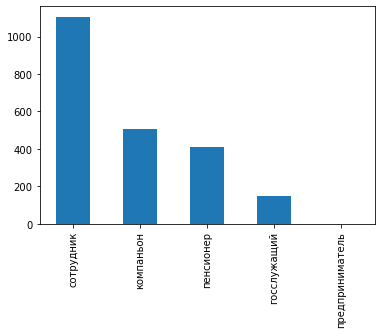

In [15]:
data['income_type'][data['total_income'].isnull()].value_counts().plot.bar();

**<font color="maroon"></font>Пропуски в данных есть у заемщиков с различными типапи занятости, можно сделать вывод, что пропуски обусловлены нежеланием заёмщиков их сообщать.</font>**

**<font color="maroon"></font>Поэтому для корректного анализа отсутствие этих данных лучше заменить на медианные значения.</font>**


In [16]:
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('median'))
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))

**<font color="maroon"></font>Проверим, не осталось ли пропусков</font>**

In [17]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**<font color="maroon"></font>Итак, пропусков в данных не осталось, можем переходить к следующему шагу.</font>**

### Шаг 2.2 Проверка данных на аномалии и исправления.

**<font color="maroon"></font>Проверим данные на наличие отрицательных значений</font>**

In [18]:
columns_numeric = data.dtypes[data.dtypes!='object'].index

In [19]:
data_is_negative = data[columns_numeric]<0

In [20]:
data_is_negative.sum()

children               47
days_employed       17667
dob_years               0
education_id            0
family_status_id        0
debt                    0
total_income            0
dtype: int64

In [21]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

**<font color="maroon"></font>Видим отрицательные значения в днях работы и количестве детей, так же есть явный выброс в виде 20 детей у 76 заёмщиков это может быть вызвано технической ошибкой или опечаткой, так как количество дней не используется для анализа, а аномальные значения в данных о детях представляют не значительную часть и подавляющее число детей у заемщиков равно нулю, заменим эти данные нулями.</font>**

In [22]:
data.loc[data['children']<0, 'children'] = 0

In [23]:
data.loc[data['children']==20, 'children'] = 0

In [24]:
data.loc[data['days_employed']<0, 'days_employed'] = 0

In [25]:
data['children'].value_counts()

0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [26]:
data['days_employed'].value_counts()

0.000000         17667
365213.306266      414
394214.527044        1
332278.816712        1
361424.440523        1
                 ...  
396575.730303        1
352708.834270        1
378067.765448        1
368375.356113        1
343937.404131        1
Name: days_employed, Length: 3446, dtype: int64

### Шаг 2.3. Изменение типов данных.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**<font color="maroon"></font>Вызвав информацию о типах данных, видим, что столбцы 'days_employed' и 'total_income' содержат вещественные числа.</font>**

**<font color="maroon"></font>Для удобства работы с данными заменим тип данных в столбце total_income на целочисленный.</font>**

In [28]:
data['total_income'] = data['total_income'].astype('int')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB


### Шаг 2.4. Удаление дубликатов.

In [30]:
data[data.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,0.000000,41,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для семьи
4182,1,0.000000,34,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,142594,свадьба
4851,0,365213.306266,60,среднее,1,гражданский брак,1,F,пенсионер,0,118514,свадьба
5557,0,365213.306266,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
7808,0,365213.306266,57,среднее,1,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
8583,0,365213.306266,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,118514,дополнительное образование
9238,2,0.000000,34,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для сдачи
9528,0,365213.306266,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,118514,операции со своей недвижимостью
9627,0,365213.306266,56,среднее,1,женат / замужем,0,F,пенсионер,0,118514,операции со своей недвижимостью
10462,0,365213.306266,62,среднее,1,женат / замужем,0,F,пенсионер,0,118514,покупка коммерческой недвижимости


**<font color="maroon"></font>Приведём все данные типа 'object' к нижнему регистру и удалим явные дубликаты.</font>**

In [31]:
str_columns = data.dtypes[data.dtypes=='object'].index
for index in str_columns:
    data[index] = data[index].str.lower()

In [32]:
data = data.drop_duplicates()

data[data.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


### Шаг 2.6. Категоризация дохода.

In [33]:
def total_income_category(total_income):
    if total_income <= 30000:
        return 'E'
    elif 30000 < total_income <= 50000:
        return 'D'
    elif 50000 < total_income <= 200000:
        return 'C'
    elif 200000 < total_income <= 1000000:
        return 'B'
    else:
        return 'A'
data['total_income_category'] = data['total_income'].apply(total_income_category)
data['total_income_category'].value_counts()    

/var/folders/yf/m73m060543b8zz2gw22cn96w0000gn/T/ipykernel_77155/211392410.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income_category'] = data['total_income'].apply(total_income_category)


C    16015
B     5042
D      350
A       25
E       22
Name: total_income_category, dtype: int64

**<font color="maroon"></font>Для упрощения визуализации, разбила заёмщиков на категории по уровню дохода.</font>**

### Шаг 2.7. Категоризация целей кредита.

In [35]:
data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

In [36]:
def purpose_category(purpose):
    purpose_auto = ['на покупку своего автомобиля', 'автомобиль', 'сделка с подержанным автомобилем', 'автомобили', 'на покупку подержанного автомобиля', 'свой автомобиль','на покупку автомобиля', 'приобретение автомобиля', 'сделка с автомобилем']
    purpose_property = ['операции с недвижимостью', 'покупка коммерческой недвижимости', 'операции с жильем', 'покупка жилья для сдачи', 'операции с коммерческой недвижимостью','покупка жилья', 'жилье', 'покупка жилья для семьи', 'строительство собственной недвижимости', 'недвижимость', 'операции со своей недвижимостью', 'строительство жилой недвижимости', 'покупка недвижимости', 'покупка своего жилья', 'строительство недвижимости', 'ремонт жилью', 'покупка жилой недвижимости']
    purpose_wedding = ['свадьба', 'на проведение свадьбы', 'сыграть свадьбу', 'образование', 'получение дополнительного образования', 'получение образования', 'профильное образование', 'получение высшего образования', 'заняться образованием']
    purpose_education = ['заняться высшим образованием', 'дополнительное образование', 'высшее образование']
    if purpose in purpose_auto:
        return 'операции с автомобилем'
    elif purpose in purpose_property:
        return 'операции с недвижимостью'
    elif purpose in purpose_wedding:
        return 'проведение свадьбы'
    elif purpose in purpose_education:
        return 'получение образования'
    else:
        return 'не определено'
data['purpose_category'] = data['purpose'].apply(purpose_category)
data['purpose_category'].value_counts()

/var/folders/yf/m73m060543b8zz2gw22cn96w0000gn/T/ipykernel_77155/3589290558.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['purpose_category'] = data['purpose'].apply(purpose_category)


операции с недвижимостью    10811
проведение свадьбы           4929
операции с автомобилем       4306
получение образования        1408
Name: purpose_category, dtype: int64

**<font color="maroon"></font>Скомпоновала цели кредитов по категориям.</font>**

**<font color="maroon"></font>Сгруппируем должников по количеству детей, по семейному статусу, по доходу и по целям кредита, посмотрим наглядно, как распределяются должники.</font>**

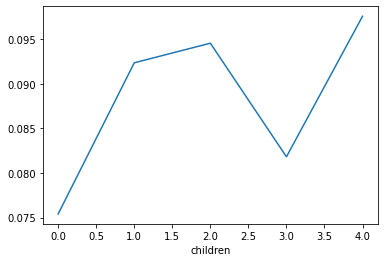

In [37]:
children_debt = data.groupby(['children'])['debt'].value_counts().unstack().T/data['children'].value_counts()
children_debt.T[1].plot();

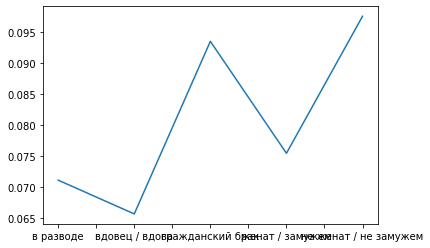

In [38]:
family_status_debt = data.groupby(['family_status'])['debt'].value_counts().unstack().T/data['family_status'].value_counts()
family_status_debt.T[1].plot();

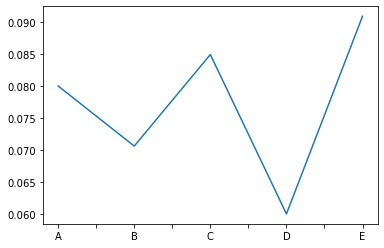

In [39]:
total_income_debt = data.groupby(['total_income_category'])['debt'].value_counts().unstack().T/data['total_income_category'].value_counts()
total_income_debt.T[1].plot();

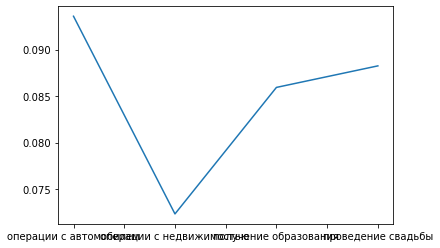

In [41]:
purpose_debt = data.groupby(['purpose_category'])['debt'].value_counts().unstack().T/data['purpose_category'].value_counts()
purpose_debt.T[1].plot();

In [42]:
purpose_debt_pivot = data.pivot_table(index='purpose_category', values='debt')

purpose_debt_pivot

,debt
purpose_category,
операции с автомобилем,0.093590
операции с недвижимостью,0.072334
получение образования,0.085938
проведение свадьбы,0.088253


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

**<font color="maroon"></font>Да, зависимость наблюдается.</font>**

##### Вывод 1:

**<font color="maroon"></font>У заемщиков без детей возвращаемость кредитов выше.</font>**

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

**<font color="maroon"></font>Да, зависимость наблюдается.</font>**

##### Вывод 2: 

**<font color="maroon"></font>Самая низкая вероятность должников среди вдовцов, чуть выше у - разведённых, еще выше - у тех, кто в браке и самая высокая - среди заемщиков в гражданском браке и не состоящих в браке.</font>**

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**<font color="maroon"></font>Да, зависимость наблюдается.</font>**

##### Вывод 3: 

**<font color="maroon"></font>Самая низкая вероятность должников среди заемщиков чей доход в диапазоне 30000-50000, чуть выше у тех, кто зарабатывает от 200000 до 1000000, еще выше вероятность появления долга у тех, чей доход выше 1000000 и от  50000 до 200000, самая высокая - у тех чей доход до 30000.</font>**

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

**<font color="maroon"></font>Наблюдается зависимось возврата кредита от его цели .</font>**

##### Вывод 4: 

**<font color="maroon"></font>Самая низкая вероятность должников, среди тех, чья цель кредита операции с недвижимостью, чуть выше - образование и свадьба, самая высокая вероятность неплательщиков среди тех, кто берёт деньги на автомобиль.</font>**

## Общий вывод:

**<font color="maroon"></font>Можно составить портрет самых добросовестных заёмщиков, ими будут вдовцы без детей, зарабатывающие 30000-50000, берущие кредит для операций с недвижимостью. Самые проблемные заемщики с детьми, не состоящие в браке, с доходом до 30000, занимающие деньги на операции с автомобилем.</font>**